In [15]:

import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle


In [16]:
Categories=['Fire','Not_Fire']


In [17]:
import os.path
if os.path.exists('Fire-Detection/Fire/.DS_Store'):
    os.remove('Fire-Detection/Fire/.DS_Store')
if os.path.exists('Fire-Detection/Not_Fire/.DS_Store'):
    os.remove('Fire-Detection/Not_Fire/.DS_Store')

In [19]:
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir='Fire-Detection'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : Fire
loaded category:Fire successfully
loading... category : Not_Fire
loaded category:Not_Fire successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.071008,0.067087,0.059244,0.073725,0.069803,0.061960,0.078352,0.074431,0.066587,0.082980,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0
3,0.071542,0.049291,0.055259,0.147387,0.149649,0.180136,0.128097,0.119116,0.138862,0.168415,...,0.103253,0.103252,0.103253,0.123306,0.123306,0.123306,0.025022,0.025022,0.025022,0
4,0.348068,0.465165,0.637902,0.375527,0.514894,0.680429,0.350190,0.483020,0.649309,0.347966,...,0.114110,0.106267,0.125875,0.116344,0.108501,0.128109,0.139646,0.131803,0.151410,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,0.972358,0.993166,0.999180,0.988966,0.995914,0.987133,0.989976,0.987260,0.975744,0.999967,...,0.999913,0.990260,0.962013,0.982663,0.986375,0.974569,0.989670,0.996410,0.993244,1
258,0.074202,0.034986,0.027143,0.070229,0.031013,0.023170,0.075526,0.036311,0.028467,0.073210,...,0.072905,0.033099,0.026703,0.081678,0.037112,0.034714,0.064067,0.018911,0.017009,1
259,0.115598,0.014260,0.000536,0.118492,0.015654,0.003938,0.120607,0.015687,0.001854,0.128742,...,0.394471,0.143010,0.036821,0.348394,0.119686,0.025960,0.317316,0.113465,0.021134,1
260,0.193288,0.334708,0.577845,0.187620,0.334206,0.577343,0.189467,0.338461,0.581604,0.199942,...,0.785809,0.718103,0.659559,0.511089,0.425695,0.394194,0.521888,0.494702,0.439214,1


In [20]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [23]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started
The Model is trained well with the given images


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [24]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1])

In [25]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1])

In [26]:
#classification_report(y_pred,y_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
#confusion_matrix(y_pred,y_test)

The model is 69.81132075471697% accurate


In [27]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


In [12]:
import pygame

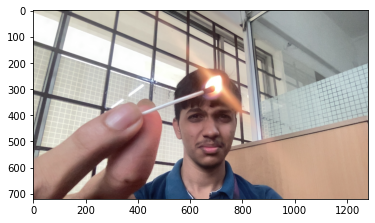

Fire = 23.143346621450586%
Not_Fire = 76.85665337854942%
The predicted image is : Not_Fire
Is the image a Not_Fire ?(y/n)
What is the image?
Enter 0 for Fire
Enter 1 for Not_Fire
Please wait for a while for the model to learn from this image :)
The model is now 64.15094339622641% accurate
Thank you for your feedback


In [104]:
model=pickle.load(open('img_model.p','rb'))

#url=input('Enter URL of Image')
url = "/Users/ak/my_code/ml_pack/1.png"
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
if(Categories[model.predict(l)[0]] == "Fire"):
  pygame.init()
  pygame.mixer.init()
  sounda= pygame.mixer.Sound("firebell.wav")
  sounda.play()
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)

  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for your feedback")
